In [1]:
import omaat_lib_offline as omaat
if "openMSIsession" not in locals():
    openMSIsession=omaat.OpenMSIsession()
openMSIsession.filename='/Users/bpb/Downloads/20250131_ZD_PlateA.h5'
openMSIsession.imageLoader_with_dialogs() #once loaded the image will be stored in the "img" variable

MPI not available. Running in serial.


<h2>Cell 4. Display base image</h2>
In order to display the generated base image, execute the cell below. The base image will be displayed below. The base image is the ion-intensity vizualization of all selected ions and will be used for mask placement. 

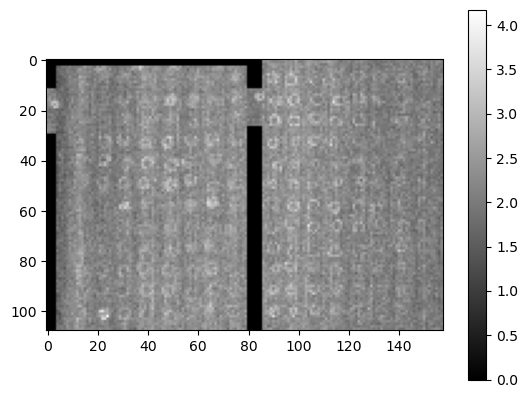

In [2]:
Zzoom=1 #set this to a higher number to see a narrower range of values (useful if one pixel is way brighter than the rest)
omaat.plt.figure(num = 'Base Image')
omaat.plt.imshow(openMSIsession.img.baseImage,cmap='gray',clim=(0.0,omaat.np.amax(openMSIsession.img.baseImage)/Zzoom))
omaat.plt.colorbar()
omaat.plt.show()

<h2>Cell 5. Placing trapezoidal mask</h2>
By executing the cell below, a trapezoidal mask containing individual markers will be generated. The size of the trapezoid and the number of markers is determined by number of rows and columns.
<ul>
<li>For this tutorial, generate a trapezoid with **16 rows and 24 columns and a Hexagonal Offset of 0**. When the cell is executed, the base image with the trapezoidal mask will be displayed below.
<li> Then, the trapezoidal mask is roughly placed over the arryaed samples; optimization of positioning of the individual markers will be performed in the next cells. The mask can be moved by dragging the corner markers of the trapezoid (highlighted with red halos) to the prefered position. For this tutorial, place the trapezoidal mask by dragging the corner markers of the trapezoid to the corner samples. Since the top right corner doesn't contain samples, roughly position the top right marker so that the top row and right column markers allign with the samples.
<li>The Hexagonal Offset, which can be a decimal number, moves every other row that many spots to the right. If you want a traditional hexagonally tiled mask, set the Hexagonal Offset to 0.5 to move every other row to the right, or set it to -0.5 to move every other row to the left.
<ul>

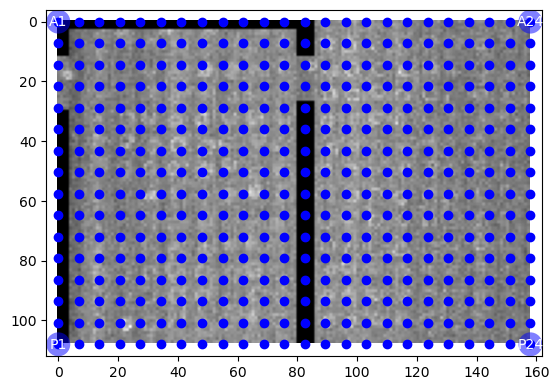

In [3]:
openMSIsession.img.roughPosition_with_dialogs()

<h2>Cell 6. Automatic spot optimization</h2>
In the next cell, the Jupyter notebook will optimze the marker position. For detials on the optimization algorithm, see the method section in the [manuscript](link to paper). For this tutorial, perform the automatic spot optimization.
<ul>
<li> First, put in the integration radius for the individual markers in the mask. For the tutorial, put in 2. 
<li> Then, put in the number of rounds of optimization. For this tutorial, put in 3. 
<li> Next, put in the number of pixels how far away from the current location should the algorithm searches. For this tutorial, put in 2.
<li> Then, if you don't want that the markers will overlap after optimalization, check the box. For this tutorial, check the box.
<li> Next, give weighting values for each ion. For this tutorial, put in 1 for all ions. 
<li> You can calculate the scores for the current marker locations, by clicking on the 'Calculate scores for current spot locations' button. For this tutorial, you can skip this step.
<li> Then, put in the minimum score necessary to move a marker. For this tutorial, put in 1. 
<li> Last, using the given parameters, the marker position can be optimized. To do this, the user has to click on the 'Optimize Spots!' button. _--After clicking on the button, the progress of the optimization will be displayed. When optimization is completed, the message "optimization routine completed. new spot x and y positions saved." will appear--_

<p> _--Performing the spot optimization is optional. Individual markers can be positioned manually in the cell 'Displaying optimized marker(s) positioning'--_

In [4]:
#automagically optimize the spot centers to correspond to the actual spots on the image
openMSIsession.img.optimizeSpots_with_dialogs()

<h2>Cell 7. Displaying and finetuning optimized marker positioning</h2>
In order to view the optimized marker postioning, execute the cell below. The base image will be displayed below. Individual markers can be moved by dragging the markers to the preferred postion.
<p>The radius of the circular spot markers in this tool is not necessarily the same as your actual integration radius, though we have tried our best to make it a reasonable approximation. Use the "Calculating spot areas" cell below to see the shapes of your actual calculated spots.</p>
<p>If no automatic spot optimization was performed, the trapezoidal mask will be at same postion as it was. Still, individual markers can be moved by dragging the markers to the preferred postion.

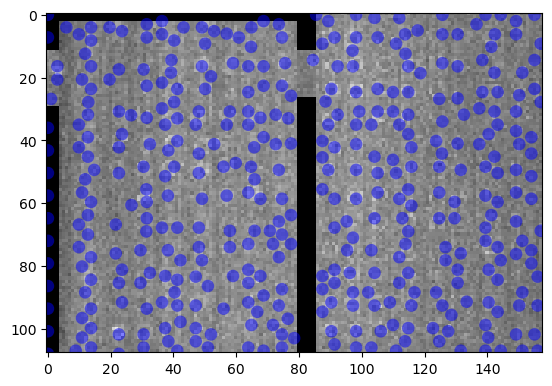

In [5]:
#check the positions of the spots and manually adjust them if need be
radius=omaat.get_default_params()['arrayed_analysis_radius']
openMSIsession.img.fineTunePosition(markerRadius=radius,colormap='gray',markercolor='blue')

<h2>Cell 8. Saving Arrayed Image</h2>
If needed, the arrayed image, including the coordinates of the spots, can be stored in a 'pickle' file. First, enter a name between the parentheses, replacing name_pickle_file. Then execute the cell to save the file. 
<p> _--For this tutorial, saving the mask position is optional--_

In [6]:
#Optional: Save the ArrayedImage into a pickle file.
filename="filename.arrayed_img"
omaat.pickle.dump(openMSIsession.img, open(filename,"wb"))
print("Done saving.")

Done saving.


<h2>Cell 9. Loading saved mask position</h2>
Saved arrayed images can be loaded from a pickle file. Enter the name of the saved pickle file between the parentheses, replacing name_saved_pickle_file. Then, execute the cell to load the file. 
<p> _--For this tutorial, this step is optional--_

In [7]:
#Optional: Load an ArrayedImage from a pickle file. This way you can work off-line
filename="filename.arrayed_img"
img=omaat.pickle.load(open(filename,"rb"))
print(img)

ArrayedImage based on /Users/bpb/Downloads/20250131_ZD_PlateA.h5
Ions loaded: [979.4, 1079.35, 1141.35, 1241.25]
# of spot locations defined: None
# of spot pixel masks defined: None


<h2>Cell 10. Calculating the spot areas, and final inspection</h2>
Execute the cell below, to calculate which pixels belong to which spot. The integration radius of the markers can be adjusted, but if you leave it as-is, the same number you used in the optimization stage will be used.
A visual representation of the marker size and positioning will be genreated for visiual inspection.
<p>--The message "x spots generated. number of spots with N pixels:{x: x, x: x}" will appear--_

384 spots generated. number of spots with N pixels:{4: 2, 10: 45, 12: 77, 8: 10, 7: 15, 6: 4, 13: 156, 14: 48, 11: 24, 9: 2, 2: 1}


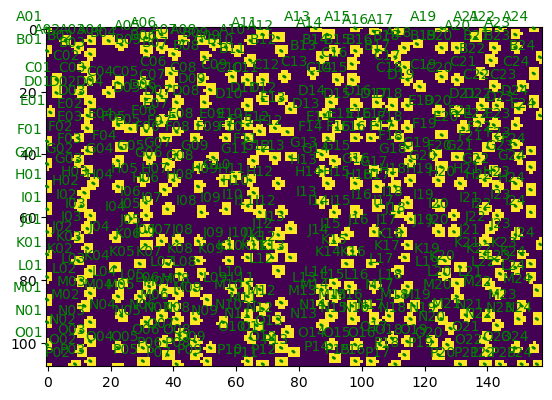

In [8]:
#You'll need to call this function. It returns a list of spots (where each spot is a list of pixels),
#which is also stored inside the object.

# line 536
# see if default_params overwrites parameters specified as kwargs

radius = omaat.get_default_params()['arrayed_analysis_radius']
#this is the same integration radius that you set in the optimization step

spots=openMSIsession.img.generateSpotList(integrationRadius=radius)

openMSIsession.img.showMaskedImage(spotList=spots,alphaRows=True)

<h2>Cell 11. Exporting results into a comma-separated text file</h2>
The next cell is used to save the results of the arrayed analysis tool as a table into a .csv file. It will name the file after the current date and time, but if you want to give the file a specific name, enter the name between the quotes after filename=.

The file will be a comma-separated file (.csv file) which you could open in Excel to do further data anlysis.

In [9]:
#Write results to a file
#if you don't pass it an explicit spotList it will use the spot set stored in the ArrayedImage
filename="/Users/bpb/Downloads/out.csv"  #If you want a specific filename, enter it here. .csv extension will be automatically added
openMSIsession.img.writeResultTable(fileName=filename,alphaRows=True)

/Users/bpb/Downloads/out.csv.csv

<h2>Cell 12. Using pandas to perform programmatic data analysis</h2>
If you prefer to use Pandas over Excel to do data analysis, the resultsDataFrame method returns a Pandas dataframe with the same kind of information that the writeResultTable method gives.
In this example, we compute the first ion as a percentage of all ions loaded, and plot those percentages, from small to large, using matplotlib. 

In [ ]:
df=openMSIsession.img.resultsDataFrame(minPixelIntensity=0,alphaRows=True) #generate the dataframe
# IPython.display.display(df)

sums_df=df.loc[:,(slice(None),'sum')] #get the sums from the dataframe
sums_df.columns = sums_df.columns.get_level_values(0) #name the columns to make indexing easier later
percentage_firstion=100.0*sums_df[openMSIsession.img.ions[0]]/sums_df.sum(axis=1) #calculate the percentage
percentage_firstion.sort() #rank the data from low to high. Using sort() instead of sort_values(inplace=True) for backward compatibility
omaat.plt.figure()
omaat.plt.bar(range(len(percentage_firstion)),percentage_firstion,edgecolor='b') #define a bar chart
omaat.plt.xlabel('Spot rank') #set x axis label
omaat.plt.ylabel("% m/z={:.1f} of all loaded ions".format(openMSIsession.img.ions[0])) #set y axis label
omaat.plt.xlim(0,len(percentage_firstion)-1) #set x axis range
omaat.plt.show()
df.head()

<h2>Cell 13. Viewing and manipulating spot spectra</h2>
You can request the average spectra for your spots from the OpenMSI server.
The toolkit can return the spectral data as a dataframe, which makes plotting straight-forward

Quite a lot of data needs to be transferred between the server and this script, so allow some time
for this example to run

In [ ]:
spectra_df=openMSIsession.getSpotSpectra(openMSIsession.img,verbose=True) #Loads the spectra from the OpenMSI server
                                                           #It's  lot of data, so save the desulting dataframe
                                                           #so that you dont have to run this method repeatedly

omaat.plt.figure()
A01_spectrum=spectra_df["A01"] # get only the spectrum for the spot at location A01
A01_spectrum.plot() #plot the entire spectrum for spot A01
omaat.plt.xlabel("m/z")
omaat.plt.ylabel("intensity")
omaat.plt.show()

omaat.plt.figure()
A01_spectrum[900:1950].plot() #plot only the m/z values between 900 and 1200
omaat.plt.xlabel("m/z")
omaat.plt.ylabel("intensity")
omaat.plt.show()

omaat.plt.figure()
spectra_df.plot() # plot ALL the spectra that are loaded on top of each other.
                  #Depending on how many spots are in your image, this can be
                  #a LOT of data, if you don't have a good computer this might crash.
omaat.plt.xlabel("m/z")
omaat.plt.ylabel("intensity")
omaat.plt.show()